In [1]:
# need to at least run salt_run.py first

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [3]:
from matplotlib.font_manager import FontProperties

# !!! change it to your path
personal_path = '/Users/weifeng/Library/Fonts/'

# get normal font and store it in `fira_sans_regular`
font_path = personal_path + 'Montserrat-Regular.ttf'
montserrat = FontProperties(fname=font_path)

# get bold font and store it in `fira_sans_bold`
font_path = personal_path + 'Montserrat-Bold.ttf'
montserrat_bold = FontProperties(fname=font_path)

In [4]:
df = pd.DataFrame()
for single_amount in np.linspace(0,10000,101):
    fname = '../results/salt_with_MP/'+str(int(single_amount))+'.pkl'
    df_i = pd.read_pickle(fname)
    df = pd.concat([df, df_i], ignore_index=True)

In [5]:
df

,single_amount,sub,cg,diff
0,0,0.25,-3.45,0.267483
1,100,0.25,-3.45,0.265363
2,200,0.25,-3.45,0.263252
3,300,0.25,-3.45,0.261090
4,400,0.25,-3.45,0.258919
...,...,...,...,...
96,9600,0.25,-3.45,0.011771
97,9700,0.25,-3.45,0.008880
98,9800,0.25,-3.45,0.005911
99,9900,0.25,-3.45,0.002962


In [6]:
df_itemizers = pd.DataFrame()
for single_amount in np.linspace(0,10000,101):
    fname = 'salt_results_with_MP/'+str(int(single_amount))+'_itemizers.pkl'
    df_i = pd.read_pickle(fname)
    df_itemizers = pd.concat([df_itemizers, df_i], ignore_index=True)
    df_itemizers = df_itemizers[df_itemizers['year'].isin([2025, 2026, 2035])]

In [7]:
def custom_func(group):
    # Perform your desired calculations on the group
    group['base_ratio'] = group['base_itemizers']/group['base_households']
    group['base_ratio_diff'] = group['base_ratio'] - group['base_ratio'].iloc[0]
    group['reform_ratio'] = group['reform_itemizers']/group['reform_households']
    group['reform_ratio_diff'] = group['reform_ratio'] - group['reform_ratio'].iloc[0]
    return group

df_itemizers_norm = df_itemizers.groupby(['single_amount', 'sub', 'cg'], as_index=False).apply(custom_func).reset_index().drop(columns=['level_0', 'level_1'])

/var/folders/8d/mdshyj_x3x5bn5cmqhrhn3yh0000gn/T/ipykernel_4046/24027743.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_itemizers_norm = df_itemizers.groupby(['single_amount', 'sub', 'cg'], as_index=False).apply(custom_func).reset_index().drop(columns=['level_0', 'level_1'])


In [8]:
df_itemizers_norm

,single_amount,sub,cg,year,base_itemizers,base_households,reform_itemizers,reform_households,base_ratio,base_ratio_diff,reform_ratio,reform_ratio_diff
0,0,0.25,-3.45,2025,15480820.71,1.907110e+08,15480820.71,1.907110e+08,0.081174,0.000000,0.081174,0.000000
1,0,0.25,-3.45,2026,16003404.98,1.925039e+08,7759543.82,1.925039e+08,0.083133,0.001959,0.040308,-0.040866
2,0,0.25,-3.45,2035,20055911.78,2.009231e+08,11035269.18,2.009231e+08,0.099819,0.018645,0.054923,-0.026251
3,100,0.25,-3.45,2025,15480820.71,1.907110e+08,15480820.71,1.907110e+08,0.081174,0.000000,0.081174,0.000000
4,100,0.25,-3.45,2026,16003404.98,1.925039e+08,7831307.08,1.925039e+08,0.083133,0.001959,0.040681,-0.040493
...,...,...,...,...,...,...,...,...,...,...,...,...
298,9900,0.25,-3.45,2026,16003404.98,1.925039e+08,15951453.04,1.925039e+08,0.083133,0.001959,0.082863,0.001689
299,9900,0.25,-3.45,2035,20055911.78,2.009231e+08,19969868.54,2.009231e+08,0.099819,0.018645,0.099391,0.018216
300,10000,0.25,-3.45,2025,15480820.71,1.907110e+08,15480820.71,1.907110e+08,0.081174,0.000000,0.081174,0.000000
301,10000,0.25,-3.45,2026,16003404.98,1.925039e+08,16003404.98,1.925039e+08,0.083133,0.001959,0.083133,0.001959


In [9]:
df.to_csv('../results/salt_with_MP/all.csv')

In [10]:
df_itemizers_norm.to_csv('../results/salt_with_MP/all_itemizers.csv')

In [11]:
x = df['single_amount']
y = df['diff']

In [12]:
# x = df['single_amount']
# y = []
# for i in range (1,4):
#     y.append(df.iloc[:, i].tolist())
baseline = 0
label = 'Rev diff'
# labels = ["Small", "Medium", "Large"]

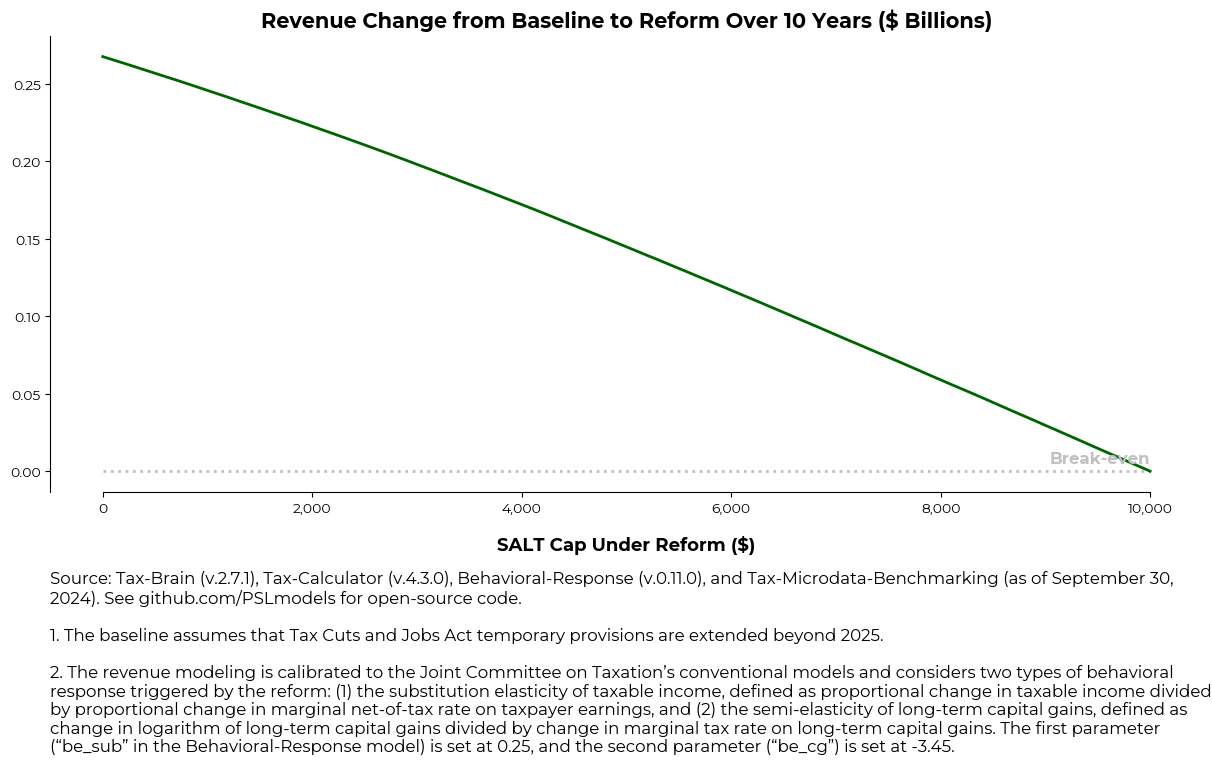

In [13]:
fig, ax = plt.subplots(
    figsize=(12, 8)
)  # This sets the figure size to 6 inches wide by 5 inches high

# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
# plt.rc("font", family="Roboto")  # controls default font
# plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels=

# Define a nice color palette:
# colors = ["#2B2F42", "#8D99AE", "#EF233C"]

# Plot the baseline
# ax.plot([x[0], max(x)], [baseline, baseline], label="Revenue Neutral")
ax.plot(
    [x[0], max(x)],
    [baseline, baseline],
    color="silver",
    linestyle=":",
    linewidth=2
)
ax.text(
    max(x),
    baseline+0.01*max(y),
    "Break-even\n",
    color="silver",
    # fontweight="bold",
    horizontalalignment="right",
    verticalalignment="center",
    size=12,
    font=montserrat_bold
)

# Plot the three model lines

ax.plot(x, y, label=label, color="darkgreen", linewidth=2)

# for i, label in enumerate(labels):
#     if label=='Small':
#         ax.plot(x, y[i], label=label, color=colors[i], linewidth=2)
#         v_adjust = 0.008
#     elif label=='Large':
#         ax.plot(x, y[i], label=label, color=colors[i], linewidth=2)
#         v_adjust = -0.004
#     else:
#         ax.plot(x, y[i], label=label, color=colors[i], linewidth=2, linestyle="--")
#         v_adjust = 0.002
#     ax.text(
#         x[0]-1,
#         y[i][0]+v_adjust,
#         label,
#         color=colors[i],
#         # fontweight="bold",
#         horizontalalignment="right",
#         verticalalignment="center",
#         size=12,
#         font=montserrat
#     )

# ax.text(
#     x[0]-1,
#     y[0][0]+0.022,
#     'Behavioral response',
#     # color=colors[i],
#     fontweight="bold",
#     horizontalalignment="right",
#     verticalalignment="center",
#     size=11,
#     font=montserrat
# )

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
# ax.yaxis.tick_right()
ax.xaxis.set_ticks_position("bottom")
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.spines["bottom"].set_bounds(min(x), max(x))

ax.set_xlabel("SALT Cap Under Reform ($)", labelpad=15, font=montserrat_bold, size=13)
ax.set_title("Revenue Change from Baseline to Reform Over 10 Years ($ Billions)", font=montserrat_bold, size=15)
# ax.legend()
# plt.show()

for tick in ax.get_xticklabels():
    tick.set_fontproperties(montserrat)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(montserrat)

plt.subplots_adjust(left=0.04, right=1, top=0.97, bottom=0.4)

ax.text(0, -0.13, """
Source: Tax-Brain (v.2.7.1), Tax-Calculator (v.4.3.0), Behavioral-Response (v.0.11.0), and Tax-Microdata-Benchmarking (as of September 30, 2024). See github.com/PSLmodels for open-source code.\n
1. The baseline assumes that Tax Cuts and Jobs Act temporary provisions are extended beyond 2025.\n
2. The revenue modeling is calibrated to the Joint Committee on Taxation’s conventional models and considers two types of behavioral response triggered by the reform: (1) the substitution elasticity of taxable income, defined as proportional change in taxable income divided by proportional change in marginal net-of-tax rate on taxpayer earnings, and (2) the semi-elasticity of long-term capital gains, defined as change in logarithm of long-term capital gains divided by change in marginal tax rate on long-term capital gains. The first parameter (“be_sub” in the Behavioral-Response model) is set at 0.25, and the second parameter (“be_cg”) is set at -3.45.
""", font=montserrat, fontsize=12, horizontalalignment='left', verticalalignment='top', wrap=True, transform=ax.transAxes)

fig.patch.set_alpha(0.0)
fig.savefig("./results/salt_with_MP/figure.png", dpi=300)

In [14]:
df_itemizers_norm_2026 = df_itemizers_norm[df_itemizers_norm['year']==2026].reset_index(drop=True)

In [15]:
x = df_itemizers_norm_2026['single_amount']
y_reform = 100*df_itemizers_norm_2026['reform_ratio_diff']

In [16]:
# x = df['single_amount']
# y = []
# for i in range (1,4):
#     y.append(df.iloc[:, i].tolist())
# baseline = 0
# label = 'Rev diff'
labels = ["2025 itemizers = 100",
          "2026 under reform",
]

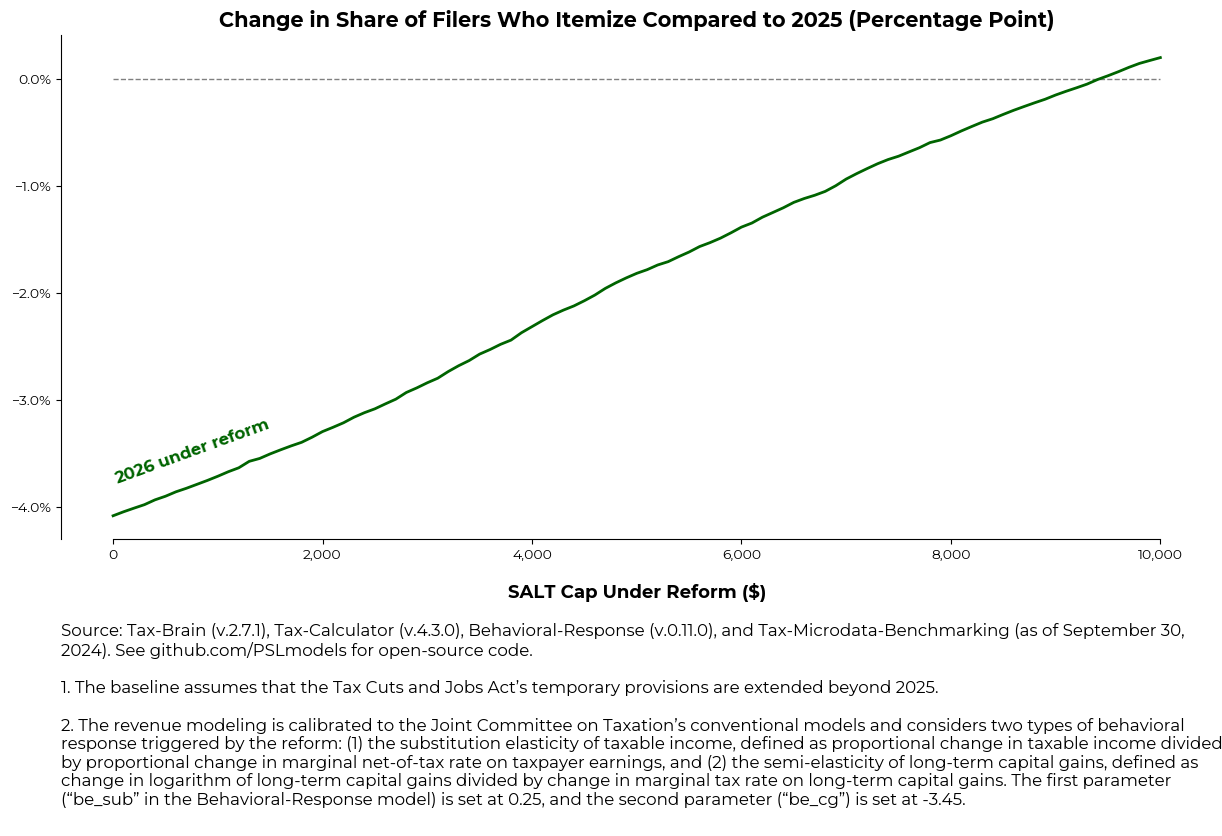

In [17]:
fig, ax = plt.subplots(
    figsize=(12, 8)
)  # This sets the figure size to 6 inches wide by 5 inches high

# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
# plt.rc("font", family="Roboto")  # controls default font
# plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels=

# Define a nice color palette:
# colors = ["#2B2F42", "#8D99AE", "#EF233C"]

# Plot the baseline
# ax.plot([x[0], max(x)], [baseline, baseline], label="Revenue Neutral")
# ax.plot(
#     [x[0], max(x)],
#     [baseline, baseline],
#     color="silver",
#     linestyle=":",
#     linewidth=2
# )
# ax.text(
#     max(x),
#     baseline+0.01*max(y),
#     "Break-even\n",
#     color="silver",
#     # fontweight="bold",
#     horizontalalignment="right",
#     verticalalignment="center",
#     size=12,
#     font=montserrat_bold
# )

# Plot the three model lines

# ax.line(x, y1, label=label, color="darkgreen", linewidth=2)

for i, label in enumerate(labels):
    if i==0:
        ax.plot([x.min(), x.max()], [0, 0], label=label, color='gray', linestyle="--", linewidth=1)
        # ax.text(x.iloc[-1], y.iloc[-1]-6, label, color='gray', horizontalalignment="right", verticalalignment="center", size=12, font=montserrat)
    else:
        y = y_reform
        ax.plot(x, y, label=label, color="darkgreen", linewidth=2)
        ax.text(x.iloc[0], y.iloc[0]+0.6, label, color="darkgreen", horizontalalignment="left", verticalalignment="center", size=12, font=montserrat_bold, rotation=20)

# ax.text(
#     x[0]-1,
#     y[0][0]+0.022,
#     'Behavioral response',
#     # color=colors[i],
#     fontweight="bold",
#     horizontalalignment="right",
#     verticalalignment="center",
#     size=11,
#     font=montserrat
# )

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.spines["top"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
# ax.yaxis.tick_right()
ax.xaxis.set_ticks_position("bottom")
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.spines["bottom"].set_bounds(min(x), max(x))

ax.set_xlabel("SALT Cap Under Reform ($)", labelpad=15, font=montserrat_bold, size=13)
ax.set_title("Change in Share of Filers Who Itemize Compared to 2025 (Percentage Point)", font=montserrat_bold, size=15)
# ax.legend()
# plt.show()

for tick in ax.get_xticklabels():
    tick.set_fontproperties(montserrat)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(montserrat)

plt.subplots_adjust(left=0.04, right=1, top=0.97, bottom=0.34)

ax.text(0, -0.13, """
Source: Tax-Brain (v.2.7.1), Tax-Calculator (v.4.3.0), Behavioral-Response (v.0.11.0), and Tax-Microdata-Benchmarking (as of September 30, 2024). See github.com/PSLmodels for open-source code.\n
1. The baseline assumes that the Tax Cuts and Jobs Act’s temporary provisions are extended beyond 2025.\n
2. The revenue modeling is calibrated to the Joint Committee on Taxation’s conventional models and considers two types of behavioral response triggered by the reform: (1) the substitution elasticity of taxable income, defined as proportional change in taxable income divided by proportional change in marginal net-of-tax rate on taxpayer earnings, and (2) the semi-elasticity of long-term capital gains, defined as change in logarithm of long-term capital gains divided by change in marginal tax rate on long-term capital gains. The first parameter (“be_sub” in the Behavioral-Response model) is set at 0.25, and the second parameter (“be_cg”) is set at -3.45.
""", font=montserrat, fontsize=12, horizontalalignment='left', verticalalignment='top', wrap=True, transform=ax.transAxes)

fig.patch.set_alpha(0.0)
fig.savefig("./results/salt_with_MP/figure_itemizers.png", dpi=300)